# Explonatory Data Analisys - Call Center Performance
# Álvaro Sánchez Martín

In [19]:
#Importaciones
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as numpy
import pandas as pd
import seaborn as sns

In [24]:
# Colores personalizados para las gráficas
colors = ["#f87456", "#d9f1cf", "#c1c5ef", "#e6edfe", "#ffc9e0", "#ffffff"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["#d9f1cf", "#c1c5ef"])

## 1-Entendimiento de los datos

In [2]:
#Carga del dataset
df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/EDA_Entrega/src/data/Call Center.csv")

#Visualización del dataset
df

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,10/29/2020,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,NaN,10/05/2020,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,NaN,10/04/2020,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,10/17/2020,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,NaN,10/17/2020,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA
...,...,...,...,...,...,...,...,...,...,...,...,...
32936,BRM-96715111-h-155613-wO,Othelia Ouldcott,Neutral,NaN,10/30/2020,Billing Question,Oklahoma City,Oklahoma,Web,Within SLA,13,Denver/CO
32937,UJH-96531654-y-074703-H4,Tasha Cubbinelli,Negative,NaN,10/07/2020,Billing Question,Crawfordsville,Indiana,Chatbot,Within SLA,42,Baltimore/MD
32938,WDS-58440679-I-064360-TT,Margaux Slaten,Negative,NaN,10/04/2020,Billing Question,Lehigh Acres,Florida,Chatbot,Within SLA,30,Baltimore/MD
32939,FTZ-87704815-T-824288-iC,Odey Seed,Positive,8.0,10/27/2020,Payments,Salt Lake City,Utah,Call-Center,Within SLA,38,Baltimore/MD


In [3]:
#Exploración de las columnas y de valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        32941 non-null  object 
 1   customer_name             32941 non-null  object 
 2   sentiment                 32941 non-null  object 
 3   csat_score                12271 non-null  float64
 4   call_timestamp            32941 non-null  object 
 5   reason                    32941 non-null  object 
 6   city                      32941 non-null  object 
 7   state                     32941 non-null  object 
 8   channel                   32941 non-null  object 
 9   response_time             32941 non-null  object 
 10  call duration in minutes  32941 non-null  int64  
 11  call_center               32941 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.0+ MB


In [4]:
df.isnull().sum()

id                              0
customer_name                   0
sentiment                       0
csat_score                  20670
call_timestamp                  0
reason                          0
city                            0
state                           0
channel                         0
response_time                   0
call duration in minutes        0
call_center                     0
dtype: int64

# Tabla de Variables

| Variable                  | Tipo de Dato   | Descripción                                                                 |
|---------------------------|----------------|-----------------------------------------------------------------------------|
| `id`                     | String         | Identificador único del contacto.                                            |
| `customer_name`          | String         | Nombre del cliente que realizó el contacto.                                  |
| `sentiment`              | Categórico     | Sentimiento del cliente hacia el servicio (`Very Positive`,`Negative`,etc ). |
| `csat_score`             | Numérico       | Puntuación de la satisfacción del cliente (1-10).                            |
| `call_timestamp`         | Fecha/Datetime | Fecha en la que se realizó el contacto.                                      |
| `reason`                 | Categórico     | Razón del contacto (`Billing Question`, `Payments`, etc.).                |
| `city`                   | String         | Ciudad desde donde llamó el cliente.                                       |
| `state`                  | String         | Estado desde donde llamó el cliente.                                       |
| `channel`                | Categórico     | Canal utilizado para el contacto (`Call-Center`, `Chatbot`, etc.).          |
| `response_time`          | Categórico     | Tiempo de respuesta (`Within SLA`, `Above SLA`).                           |
| `call duration in minutes` | Numérico       | Duración de la llamada en minutos.                                         |
| `call_center`            | String         | Centro de llamadas que gestionó el contacto.                                |

***Se observa que solo hay nulos en la columna "csat_score" lo cual es lógico ya que no todos los clientes tienden a valorar el contacto.***
***Aún así, disponemos de la columna "sentiment" que está relacionada con la satisfacción del cliente, por lo que la usaremos para rellenar la columna de CSAT con la media de los valores de "sentiment".***

# LIMPIEZA DE DATOS

In [6]:
#Conversión a formato datetime de la columna "call_timestamp"
df["call_timestamp"] = pd.to_datetime(df["call_timestamp"], format="%m/%d/%Y")
df = df.sort_values(by="call_timestamp")

In [7]:
#Eliminación la columna "id" ya que para este análisis no es necesaria
df = df.drop(columns = "id")

In [16]:
# Asegurar el orden lógico de `sentiment`
sentiment_order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]
df["sentiment"] = pd.Categorical(df["sentiment"], categories=sentiment_order, ordered=True)

In [17]:
# Agrupación por "sentiment" y calcular los valores estadísticos
rangos_sentiment = df.groupby("sentiment")["csat_score"].agg(['min', 'max', 'mean'])

print("Rangos de 'csat_score' por 'sentiment':")
print(rangos_sentiment)

# Conversión a un diccionario si se necesita usar más adelante
media_sentiment = rangos_sentiment["mean"].to_dict()

# Imputación los valores faltantes en "csat_score" usando las medias calculadas
df["csat_score"] = df["csat_score"].fillna(df["sentiment"].map(media_sentiment))

# Comprobación de que los valores nulos han sido reemplazados
print("\nValores nulos restantes en 'csat_score':")
print(df["csat_score"].isnull().sum())

Rangos de 'csat_score' por 'sentiment':
               min   max      mean
sentiment                         
Very Negative  1.0   4.0  2.457381
Negative       3.0   6.0  4.528131
Neutral        5.0   8.0  6.473039
Positive       7.0   9.0  7.993298
Very Positive  9.0  10.0  9.493484

Valores nulos restantes en 'csat_score':
0


/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_16574/1481569142.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rangos_sentiment = df.groupby("sentiment")["csat_score"].agg(['min', 'max', 'mean'])


# ANÁLISIS
## Análisis univariante

In [18]:
columnas = ["reason","channel", "call_center"]

for columna in columnas:
    print(f"\nFrecuencias para la columna '{columna}':")
    
    # Frecuencia absoluta
    frecuencia_absoluta = df[columna].value_counts()
    print("Frecuencia Absoluta:")
    print(frecuencia_absoluta)
    
    # Frecuencia relativa
    frecuencia_relativa = df[columna].value_counts(normalize=True) * 100
    print("\nFrecuencia Relativa (%):")
    print(frecuencia_relativa)


Frecuencias para la columna 'reason':
Frecuencia Absoluta:
reason
Billing Question    23462
Payments             4749
Service Outage       4730
Name: count, dtype: int64

Frecuencia Relativa (%):
reason
Billing Question    71.224310
Payments            14.416684
Service Outage      14.359005
Name: proportion, dtype: float64

Frecuencias para la columna 'channel':
Frecuencia Absoluta:
channel
Call-Center    10639
Chatbot         8256
Email           7470
Web             6576
Name: count, dtype: int64

Frecuencia Relativa (%):
channel
Call-Center    32.297137
Chatbot        25.062991
Email          22.676907
Web            19.962964
Name: proportion, dtype: float64

Frecuencias para la columna 'call_center':
Frecuencia Absoluta:
call_center
Los Angeles/CA    13734
Baltimore/MD      11012
Chicago/IL         5419
Denver/CO          2776
Name: count, dtype: int64

Frecuencia Relativa (%):
call_center
Los Angeles/CA    41.692723
Baltimore/MD      33.429465
Chicago/IL        16.450624
Denver

*El motivo más común de contacto es Billing Question, representando más del 70% de los casos.*
Esto indica que una gran parte de los clientes tienen dudas o problemas relacionados con facturación.


Los motivos relacionados con Payments e Service Outage están casi igualados, aunque representan un porcentaje mucho menor (~14% cada uno).


*El canal más utilizado es el Call-Center (32.30%), seguido por Chatbot (25.06%).* 
Esto refleja que los clientes aún prefieren interactuar con agentes humanos, aunque los canales digitales están ganando relevancia.


Los canales Email y Web tienen una participación más baja pero aún significativa, mostrando que una proporción considerable de clientes opta por métodos asincrónicos para comunicarse.


*El centro de llamadas de Los Angeles/CA maneja el mayor volumen de contactos (41.69%), seguido de Baltimore/MD (33.43%).*
Esto sugiere que estos centros tienen mayor capacidad o reciben mayor carga de trabajo.

# ANÁLISIS BIVARIANTE

### "reason" vs. "sentiment"

<Figure size 1200x600 with 0 Axes>

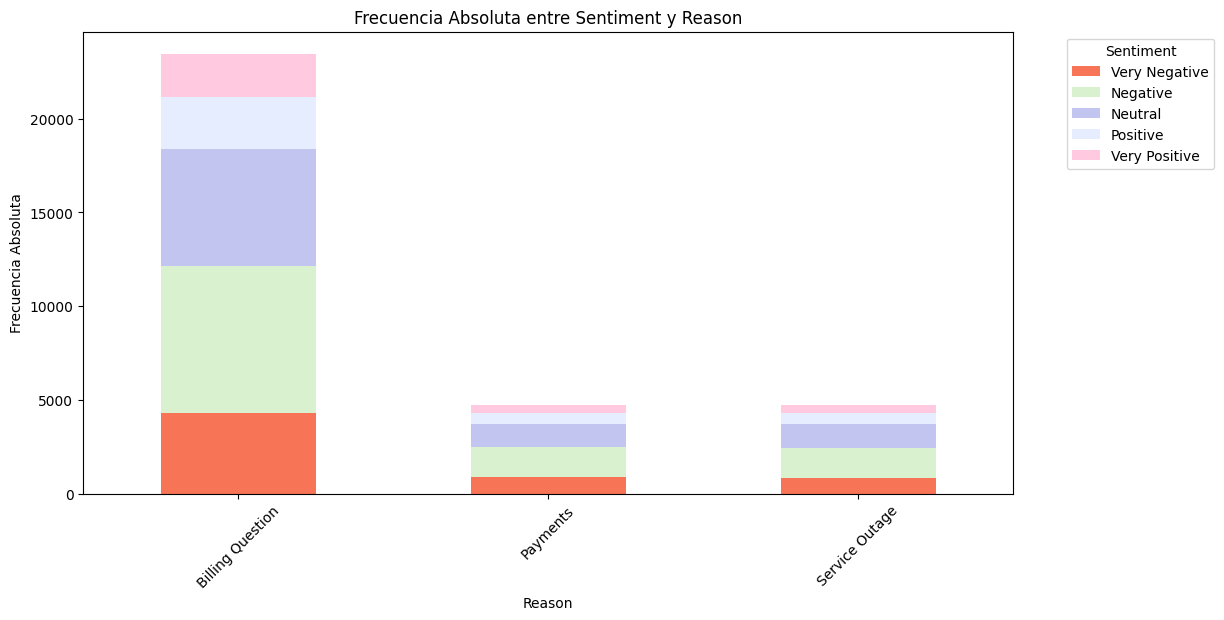

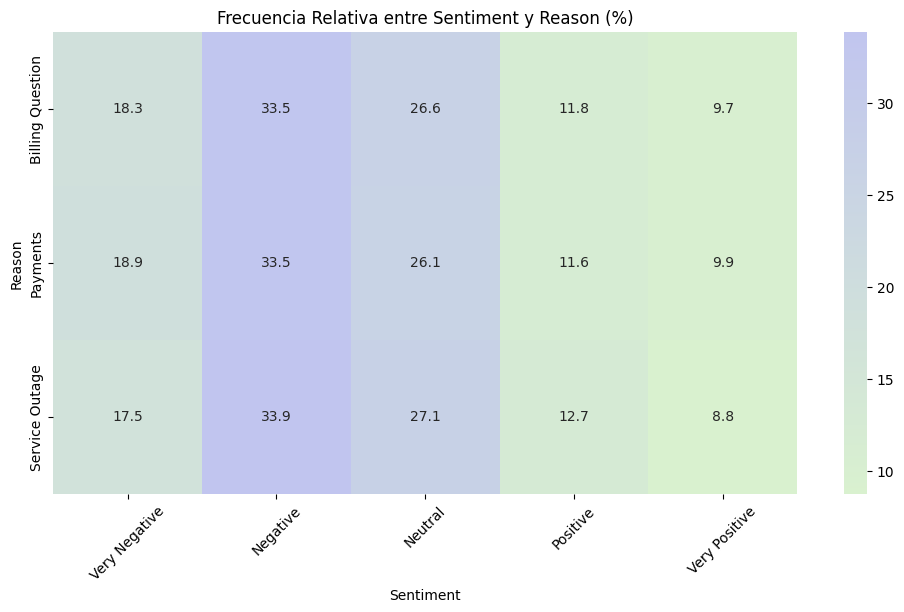

In [25]:
sentiment_reason_absolute = pd.crosstab(df["reason"], df["sentiment"])
sentiment_reason_relative = pd.crosstab(df["reason"], df["sentiment"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
sentiment_reason_absolute[sentiment_order].plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(sentiment_reason_absolute.columns)])
plt.title("Frecuencia Absoluta entre Sentiment y Reason")
plt.xlabel("Reason")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_reason_relative[sentiment_order], annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Sentiment y Reason (%)")
plt.xlabel("Sentiment")
plt.ylabel("Reason")
plt.xticks(rotation=45)
plt.show()

#### Conclusión:
Las razones como "Billing Question" tienen mayor frecuencia de sentimientos negativos, mientras que "Payments" está asociado con sentimientos positivos.

### "sentiment" vs. "channel"

<Figure size 1200x600 with 0 Axes>

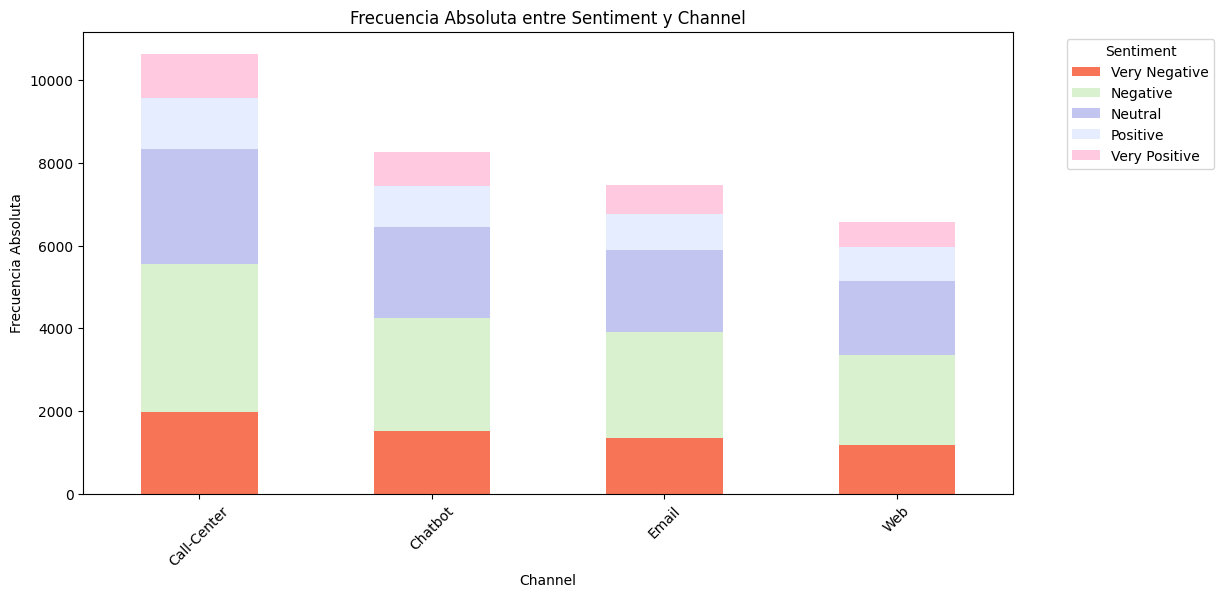

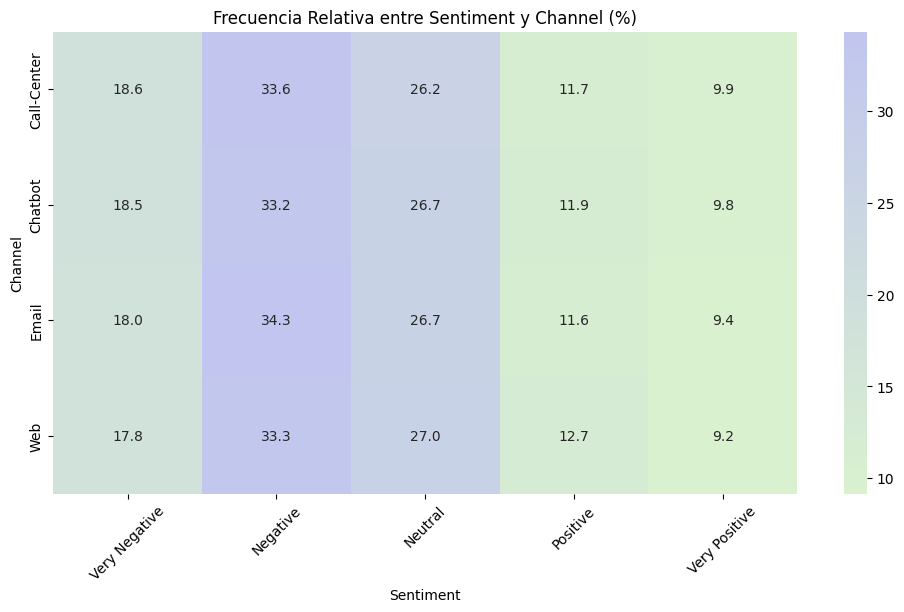

In [26]:
sentiment_channel_absolute = pd.crosstab(df["channel"], df["sentiment"])
sentiment_channel_relative = pd.crosstab(df["channel"], df["sentiment"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
sentiment_channel_absolute[sentiment_order].plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(sentiment_order)])
plt.title("Frecuencia Absoluta entre Sentiment y Channel")
plt.xlabel("Channel")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_channel_relative[sentiment_order], annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Sentiment y Channel (%)")
plt.xlabel("Sentiment")
plt.ylabel("Channel")
plt.xticks(rotation=45)
plt.show()

#### Conclusión:
 El canal "Call-Center" tiene mayor proporción de sentimientos positivos, mientras que "Chatbot" tiene más sentimientos negativos.


 Lo cual nos da una idea de que los clientes prefieren el contacto humano más que la automatización.


 También nos puede dar una idea de que el "Chatbor" no es lo suficientemente inteligente para responder todas las preguntas.

### "sentiment" vs. "call_center"

<Figure size 1200x600 with 0 Axes>

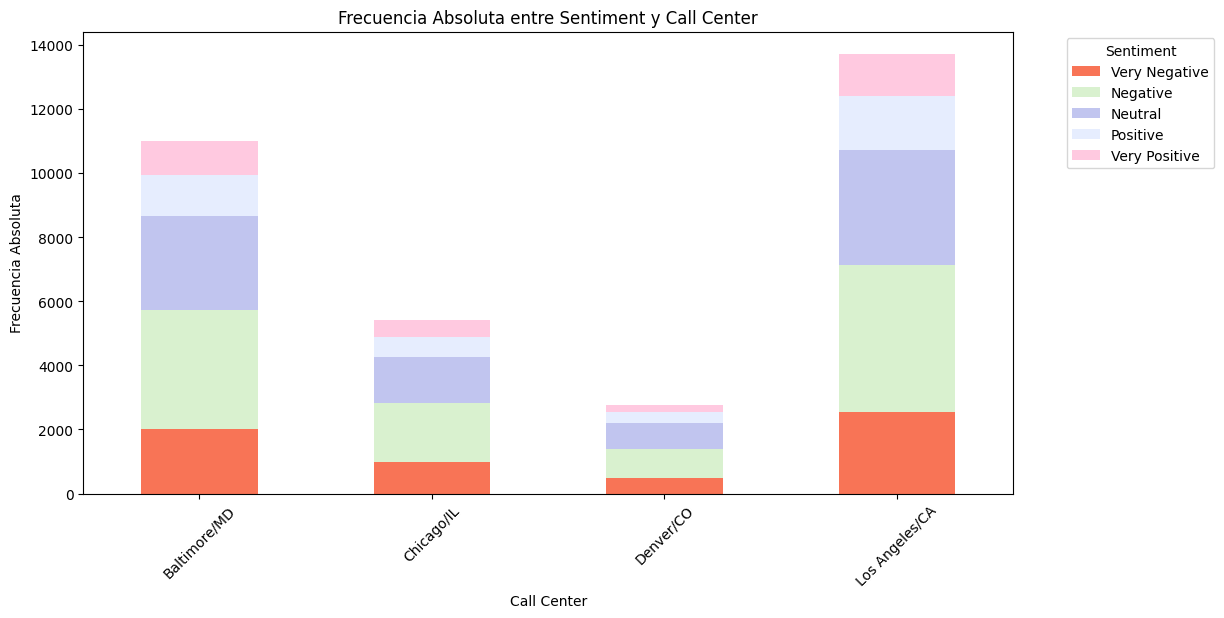

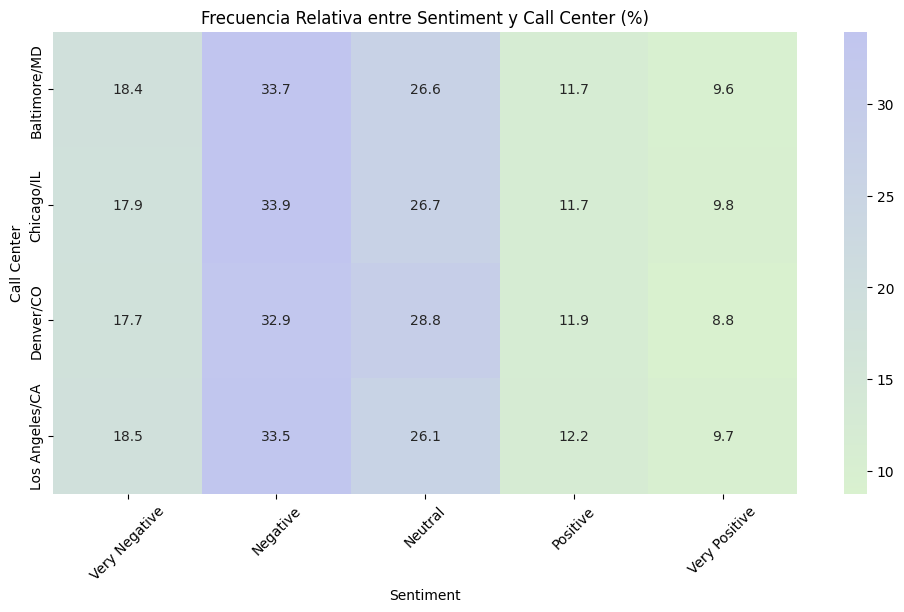

In [27]:
sentiment_call_center_absolute = pd.crosstab(df["call_center"], df["sentiment"])
sentiment_call_center_relative = pd.crosstab(df["call_center"], df["sentiment"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
sentiment_call_center_absolute[sentiment_order].plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(sentiment_order)])
plt.title("Frecuencia Absoluta entre Sentiment y Call Center")
plt.xlabel("Call Center")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_call_center_relative[sentiment_order], annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Sentiment y Call Center (%)")
plt.xlabel("Sentiment")
plt.ylabel("Call Center")
plt.xticks(rotation=45)
plt.show()

#### Conclusión

El centro de "Los Angeles/CA" tienen mayor proporción de sentimientos positivos, mientras que "Baltimore/MD" muestra una mayor proporción de negativos.

Nos puede dar una idea de que los agentes de "Los Angeles/CA" estén mejor entrenados y tengan mejor conocimiento


### "reason" vs. "channel"

<Figure size 1200x600 with 0 Axes>

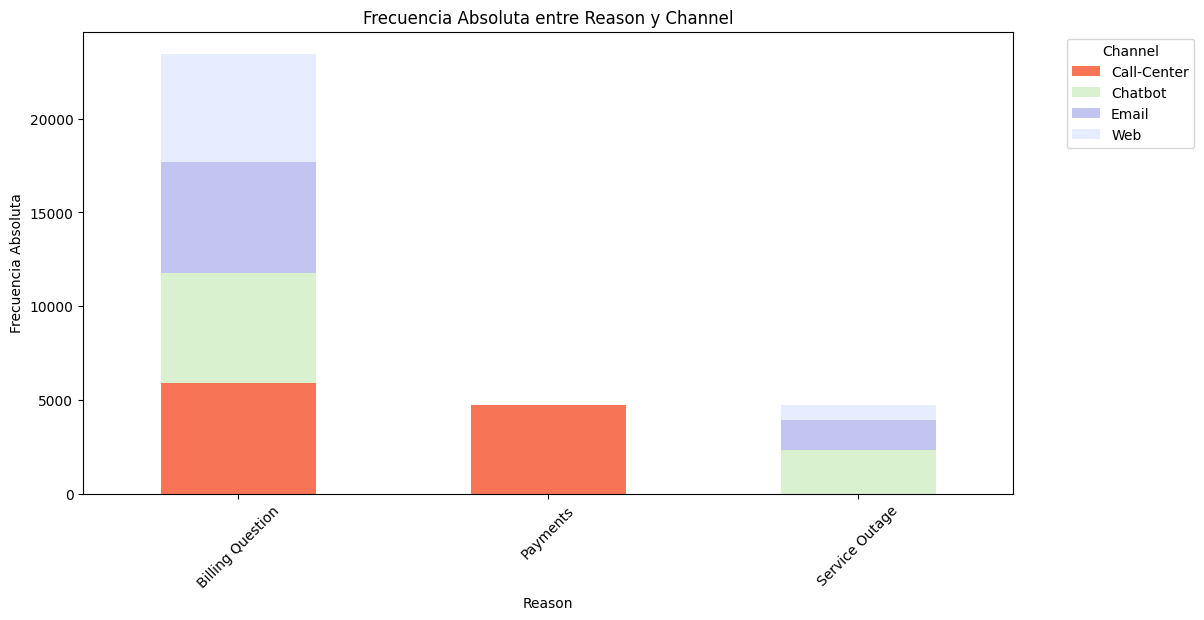

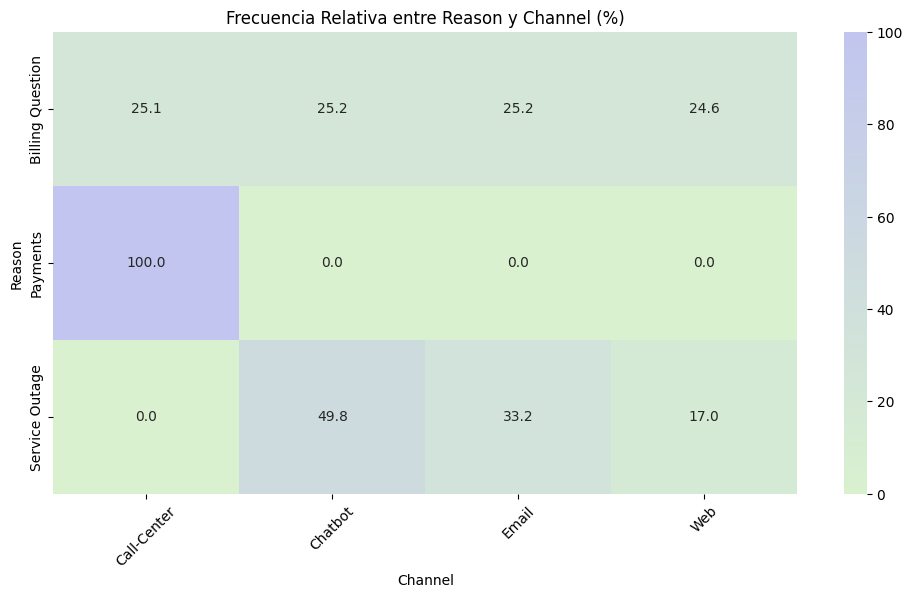

In [28]:
reason_channel_absolute = pd.crosstab(df["reason"], df["channel"])
reason_channel_relative = pd.crosstab(df["reason"], df["channel"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
reason_channel_absolute.plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(reason_channel_absolute.columns)])
plt.title("Frecuencia Absoluta entre Reason y Channel")
plt.xlabel("Reason")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=45)
plt.legend(title="Channel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(reason_channel_relative, annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Reason y Channel (%)")
plt.xlabel("Channel")
plt.ylabel("Reason")
plt.xticks(rotation=45)
plt.show()

#### Conclusión

Podemos ver que todos los contactos relacionados con pagos se hacen a traves de llamadas.


Por otro lado los de interrupción de servicio poro todos los canales menos el de llamadas.

### "reason" vs. "call_center"

<Figure size 1200x600 with 0 Axes>

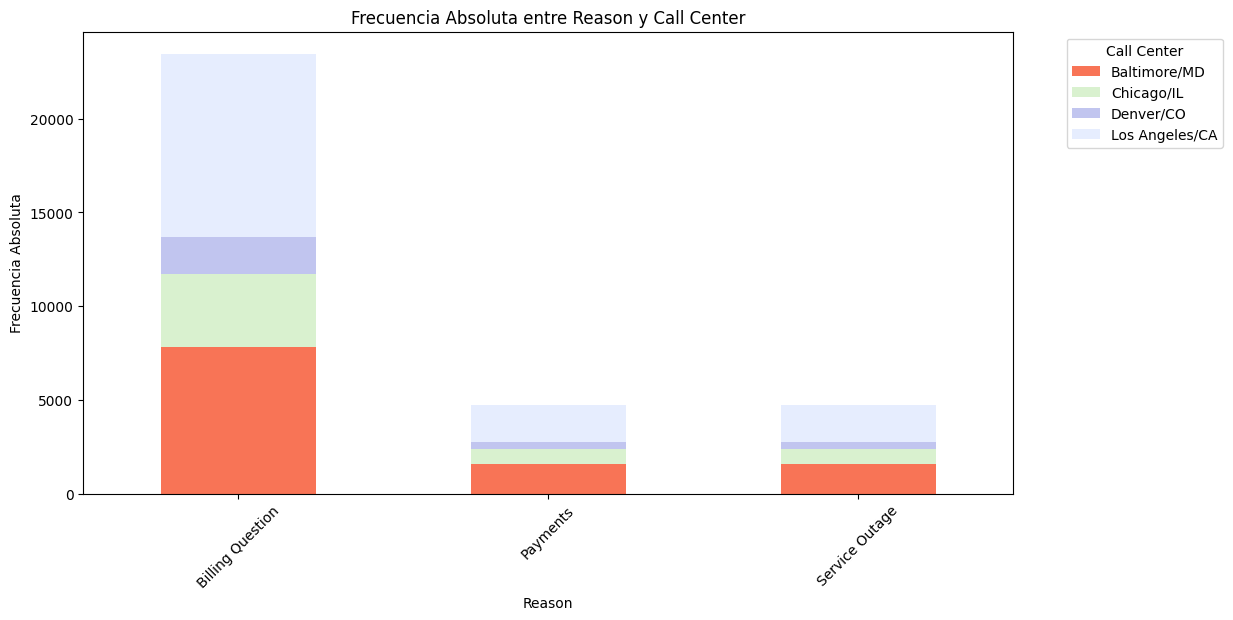

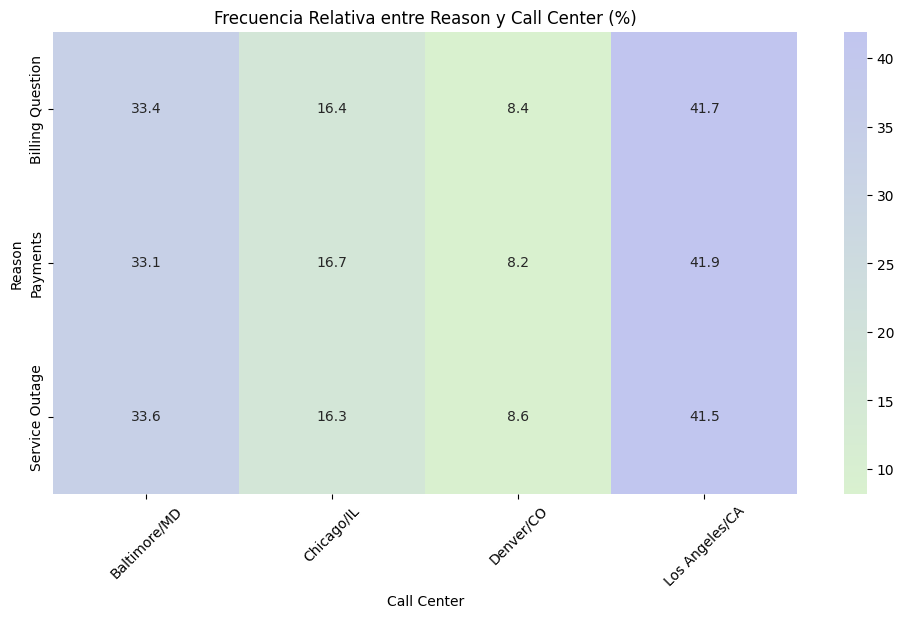

In [30]:
reason_call_center_absolute = pd.crosstab(df["reason"], df["call_center"])
reason_call_center_relative = pd.crosstab(df["reason"], df["call_center"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
reason_call_center_absolute.plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(reason_call_center_absolute.columns)])
plt.title("Frecuencia Absoluta entre Reason y Call Center")
plt.xlabel("Reason")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=45)
plt.legend(title="Call Center", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(reason_call_center_relative, annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Reason y Call Center (%)")
plt.xlabel("Call Center")
plt.ylabel("Reason")
plt.xticks(rotation=45)
plt.show()

#### Conclusión

El centro de los Angeles tiene mayor representación de contactos respecto a los otros.

### "sentiment" vs. "call_center"

<Figure size 1200x600 with 0 Axes>

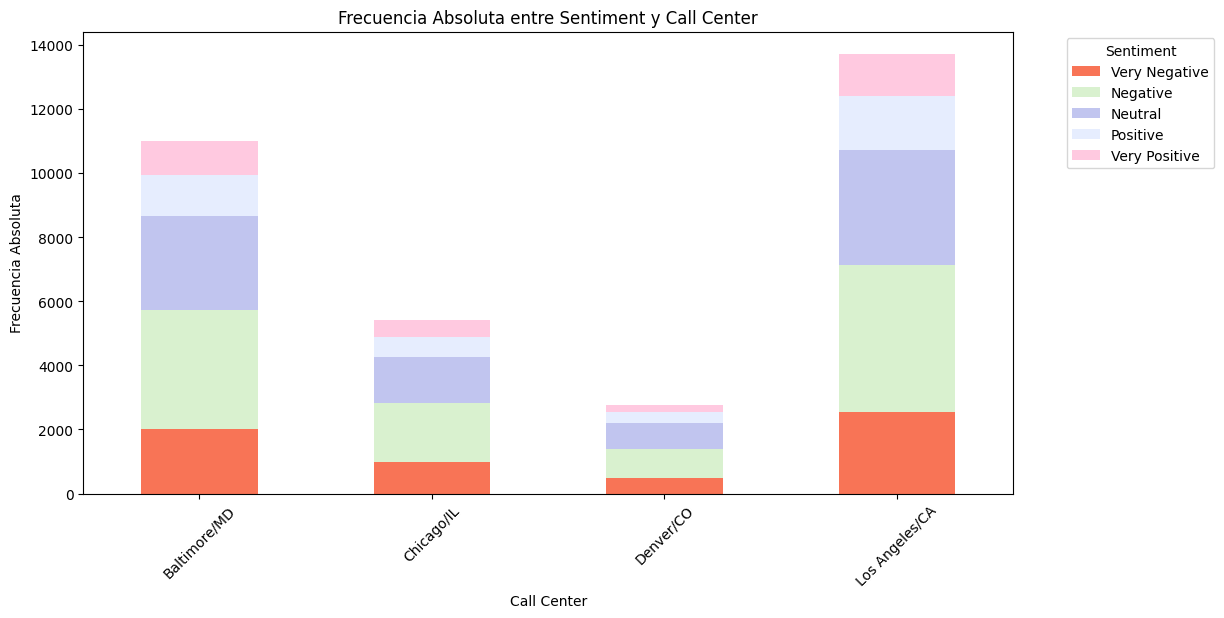

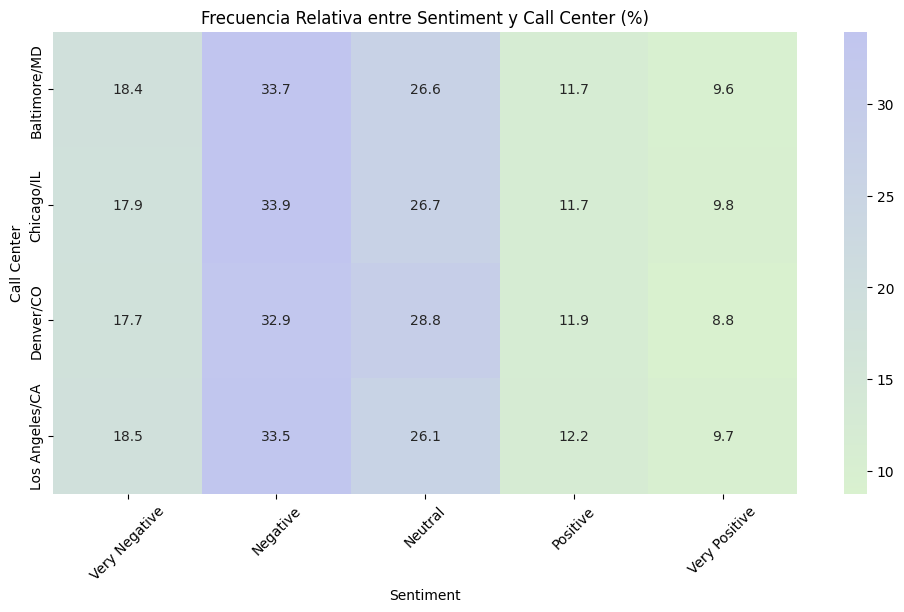

In [36]:
channel_call_center_absolute = pd.crosstab(df["call_center"], df["sentiment"])
channel_call_center_relative = pd.crosstab(df["call_center"], df["sentiment"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
channel_call_center_absolute.plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(channel_call_center_absolute.columns)])
plt.title("Frecuencia Absoluta entre Sentiment y Call Center")
plt.xlabel("Call Center")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(channel_call_center_relative, annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Sentiment y Call Center (%)")
plt.xlabel("Sentiment")
plt.ylabel("Call Center")
plt.xticks(rotation=45)
plt.show()

#### Conclusión

Los call center de Los Angeles y Baltimor tienen peor sentiment. Sin embargo el de Los Angeles tiene también el mejor.


# ANÁLISIS MULTIVARIANTE

<Figure size 1400x800 with 0 Axes>

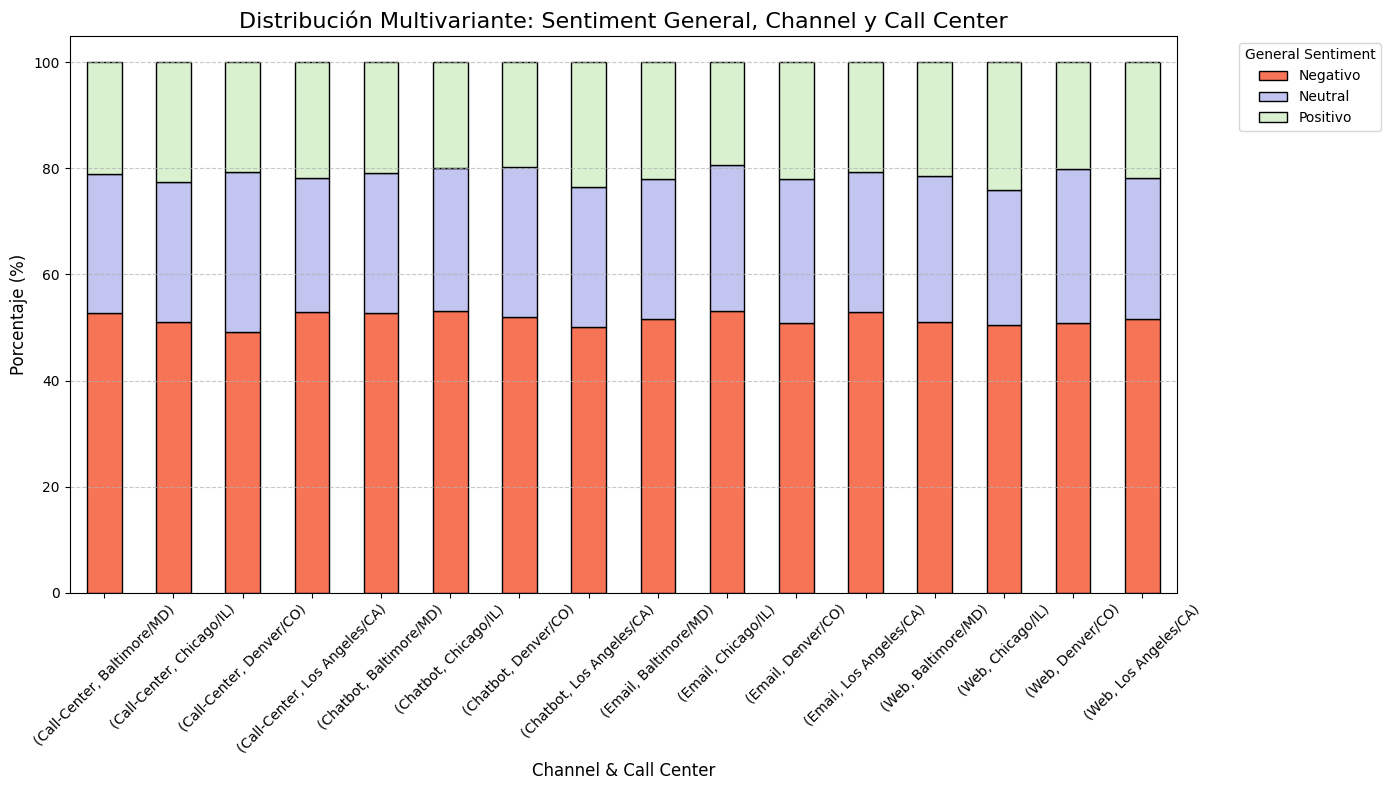

In [43]:


# Agrupar los valores de `sentiment` en categorías más generales
sentiment_map = {
    "Very Negative": "Negativo",
    "Negative": "Negativo",
    "Neutral": "Neutral",
    "Positive": "Positivo",
    "Very Positive": "Positivo"
}
df["general_sentiment"] = df["sentiment"].map(sentiment_map)

# Calcular las frecuencias relativas por combinación de Channel, Call Center y General Sentiment
bar_data = pd.crosstab([df["channel"], df["call_center"]], df["general_sentiment"], normalize="index") * 100

# Ordenar las columnas para mantener la lógica de los sentimientos
bar_data = bar_data[["Negativo", "Neutral", "Positivo"]]

# Gráfico de barras apiladas
plt.figure(figsize=(14, 8))
bar_data.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 8),
    color=["#f87456", "#c1c5ef", "#d9f1cf"],
    edgecolor="black"
)
plt.title("Distribución Multivariante: Sentiment General, Channel y Call Center", fontsize=16)
plt.xlabel("Channel & Call Center", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="General Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


